## Project Goals
- Practice handling the missing values
- Practice handling the categorical variables
- Practice handling the outliers
- Practice Scaling the data
- Get familiar with the different types of the graphs
- Select and Implement Machine Learning model
- Create a template for further projects

## Analysis Goals
- Get familiar with the data
- Find out the missing values present in the data
- Find out the outliers in the data
- Visualize the data
- Check the distributions of the data
- Check the correlations among the features

## Imports

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import pickle
import os

# Notebook Utilities
%matplotlib inline

## Functions

In [2]:
# Function which seperates feature types
def data_seperator(data, depend):
    # Stores dependant variable
    data_depend = data[depend]
    data = data.drop(depend, axis=1)
    
    # Stores categorical features
    select = [data.columns[i] for i in np.where(data.dtypes == 'O')[0]]
    data_categ = pd.DataFrame(data[select])
    
    # Stores all numerical features
    data_num = data.drop(select, axis=1)
    
    # Seperating time features from numerical features
    select = [i for i in data_num.columns if 'year' in i.lower() or 'yr' in i.lower() or 'day' in i or 'week' in i.lower()]
    data_time = pd.DataFrame(data_num[select])
    data_num = data_num.drop(select, axis=1)
    
    # Seperating discrete and continuous features
    select = [feature for feature in data_num if len(data_num[feature].unique()) < 10]
    data_discrete = pd.DataFrame(data_num[select])
    data_continuous = data_num.drop(select, axis=1)
    
    # Returning the features
    return data_num, data_discrete, data_continuous, data_categ, data_time, data_depend

## Dataset Information
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

- Source: https://www.kaggle.com/competitions/titanic/data
- Use Machine Learning to create a model that predicts which passengers survived the Titanic shipwreck.
- I chose this dataset because it has many types of features. 
- It has features with missing values and outliers
- Overall, I think this is a good dataset for practicing the basics.

## Working Directory

In [3]:
old_path = os.getcwd()
os.chdir('..')
path = os.getcwd()

## Reading Data

In [4]:
data = pd.read_csv(f'{path}/data/raw/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q


## Data Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Separating the data
Seperated the data into different variables for ease of access and keeping the original data as backup

In [8]:
data_num, data_discrete, data_continuous, data_categ, data_time, data_depend = data_seperator(data, 'Survived')

## Data Description

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


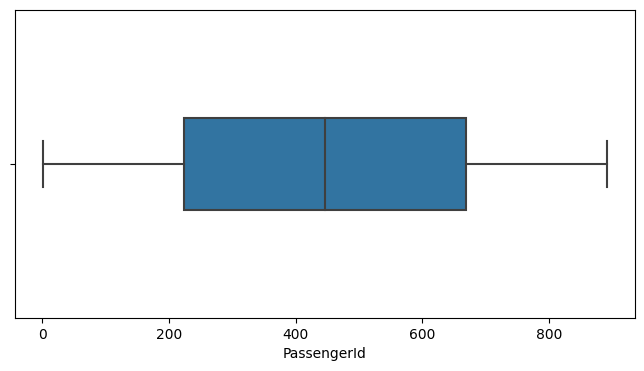

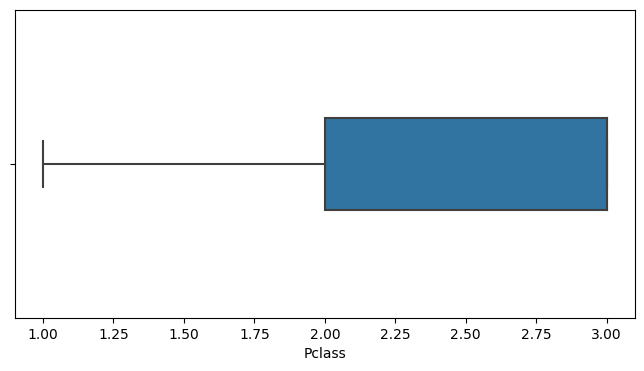

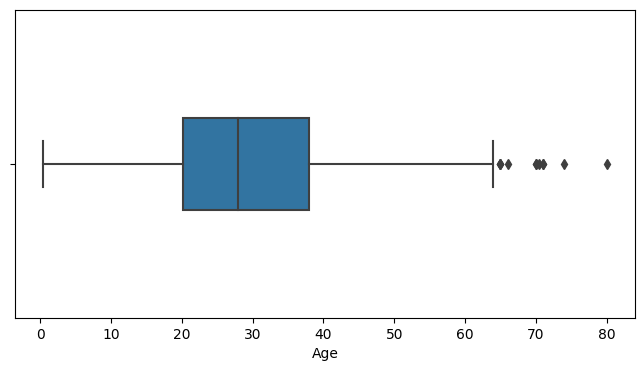

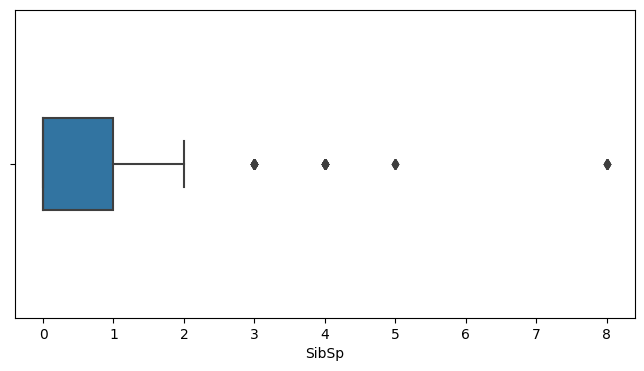

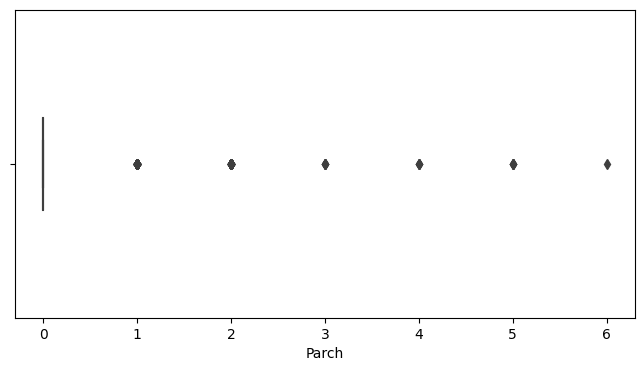

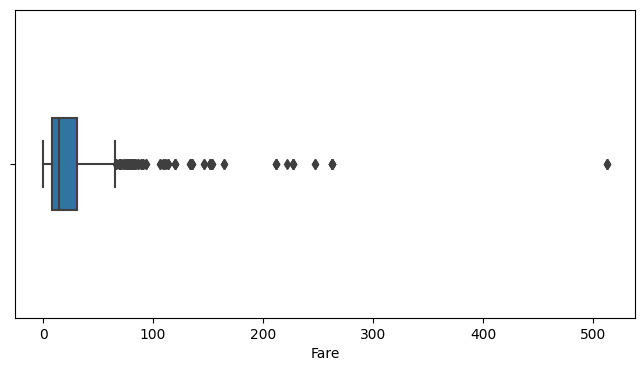

In [10]:
for feature in data_num.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(width=0.3, x=data_num[feature])

In [11]:
data_discrete.head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


## Continous Data

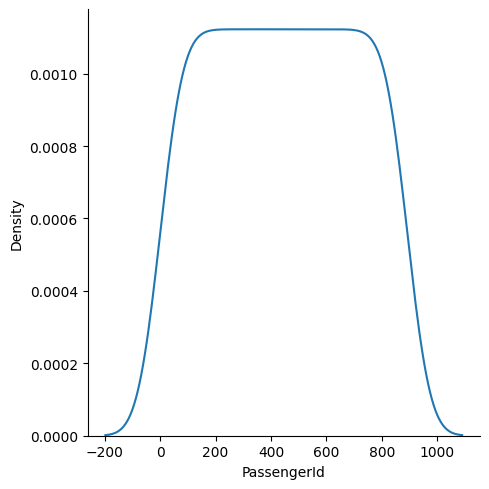

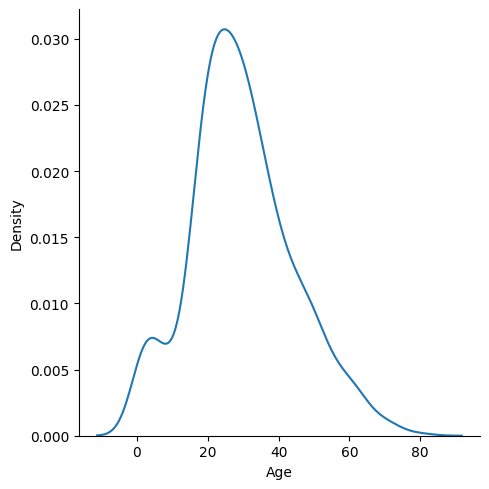

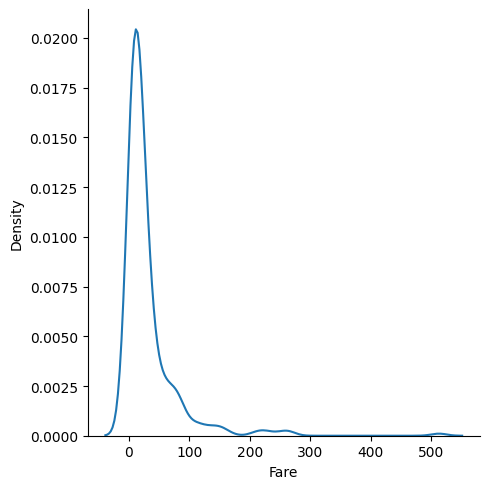

In [12]:
for feature in data_continuous.columns:
    sns.displot(data=data[feature], kind='kde')

## Discrete Data

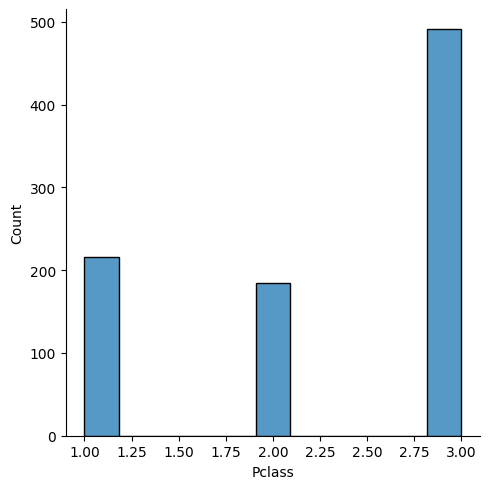

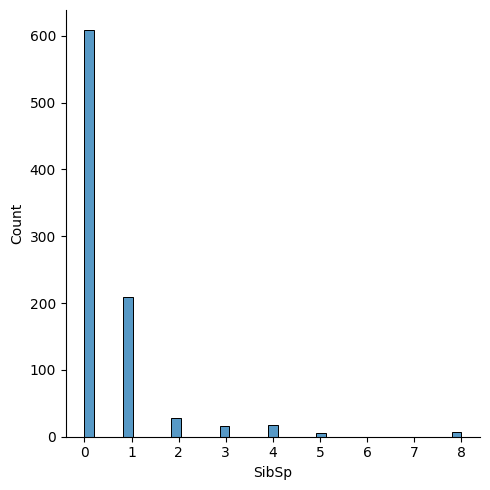

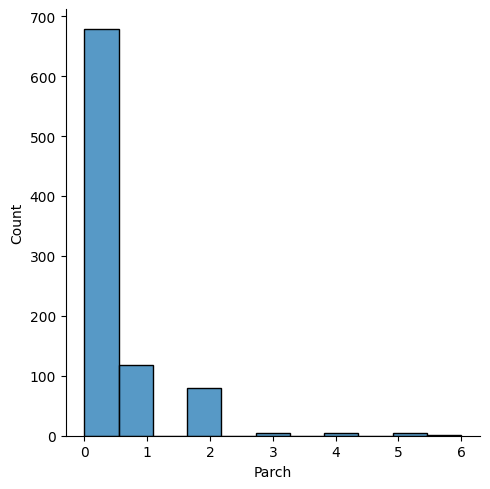

In [13]:
for feature in data_discrete.columns:
    sns.displot(data=data[feature], kind='hist')

## Categorical Data

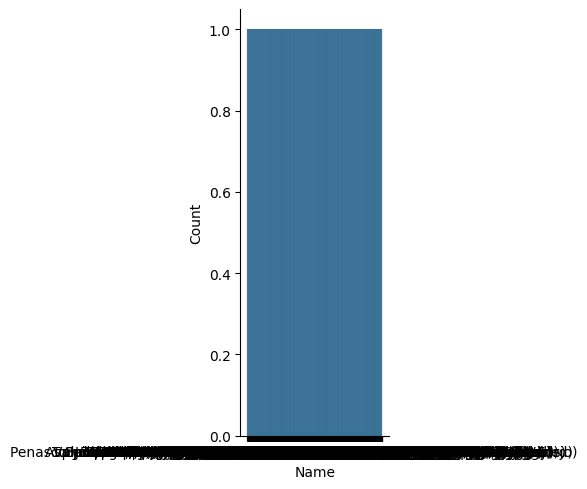

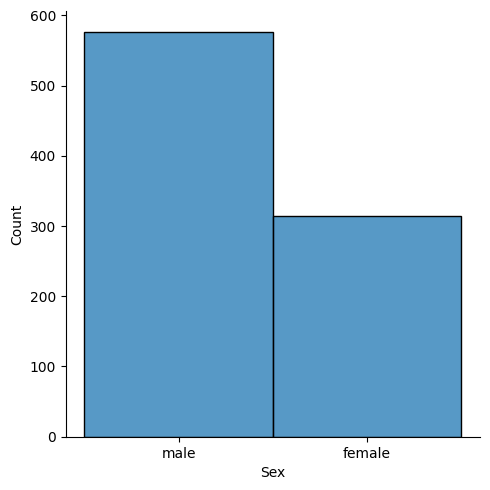

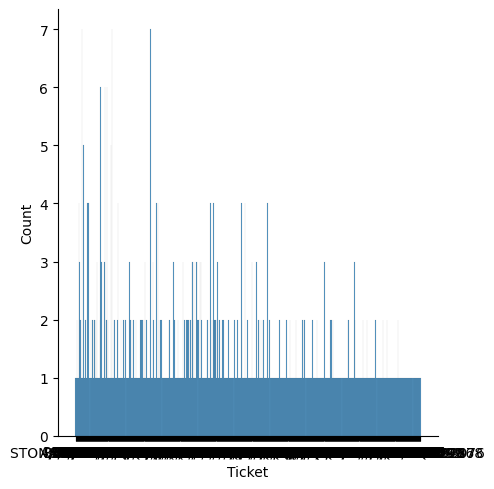

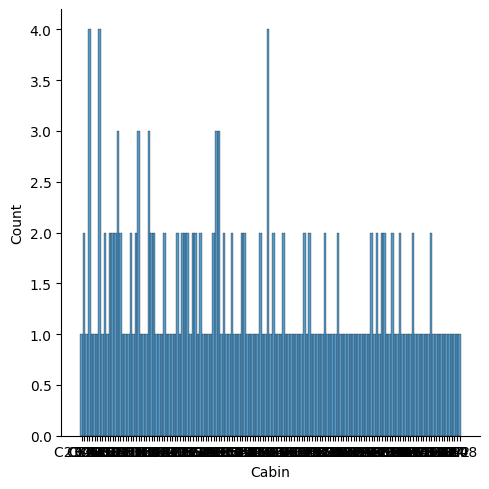

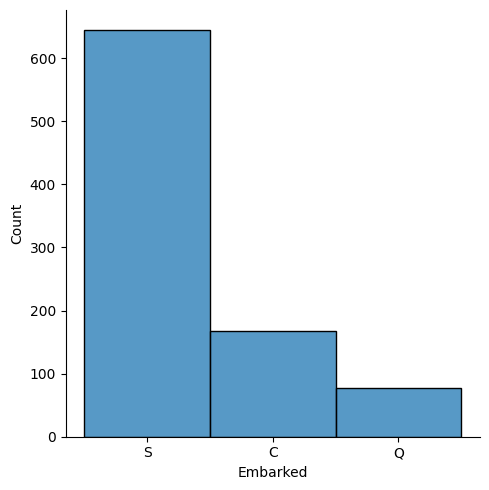

In [14]:
for feature in data_categ.columns:
    sns.displot(data=data[feature], kind='hist')

## Time Data

In [15]:
for feature in data_time.columns:
    sns.displot(data=data[feature], kind='kde')

## Data Spread

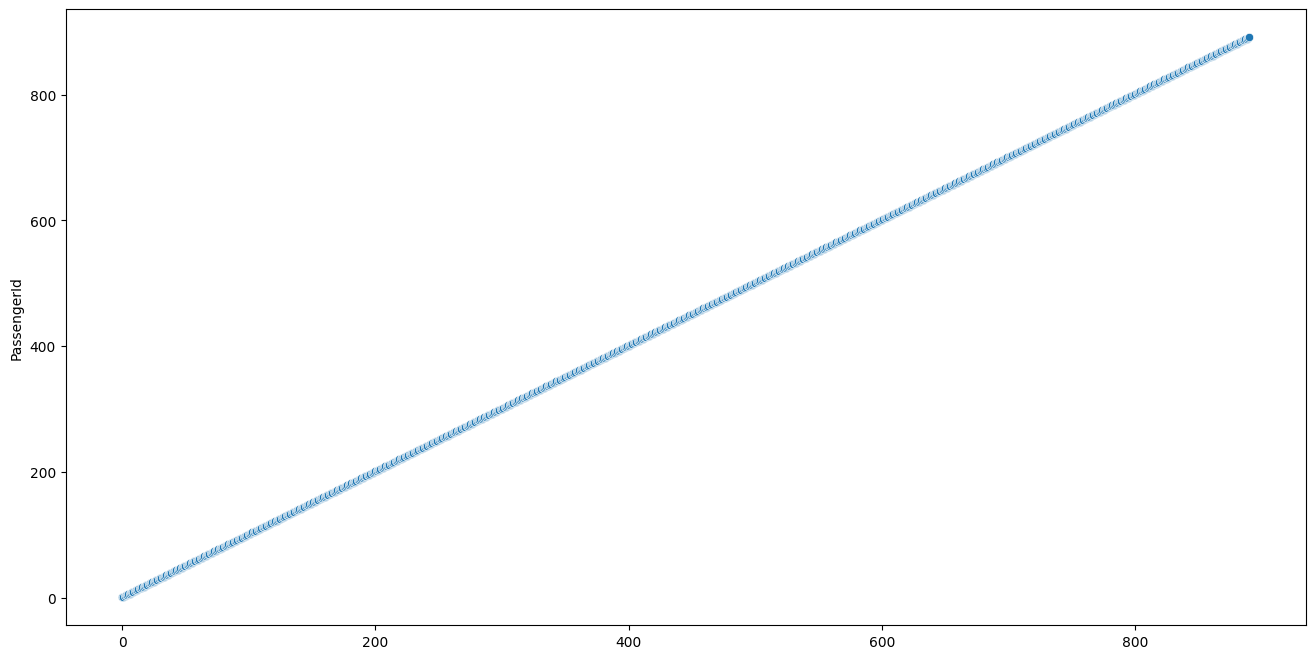

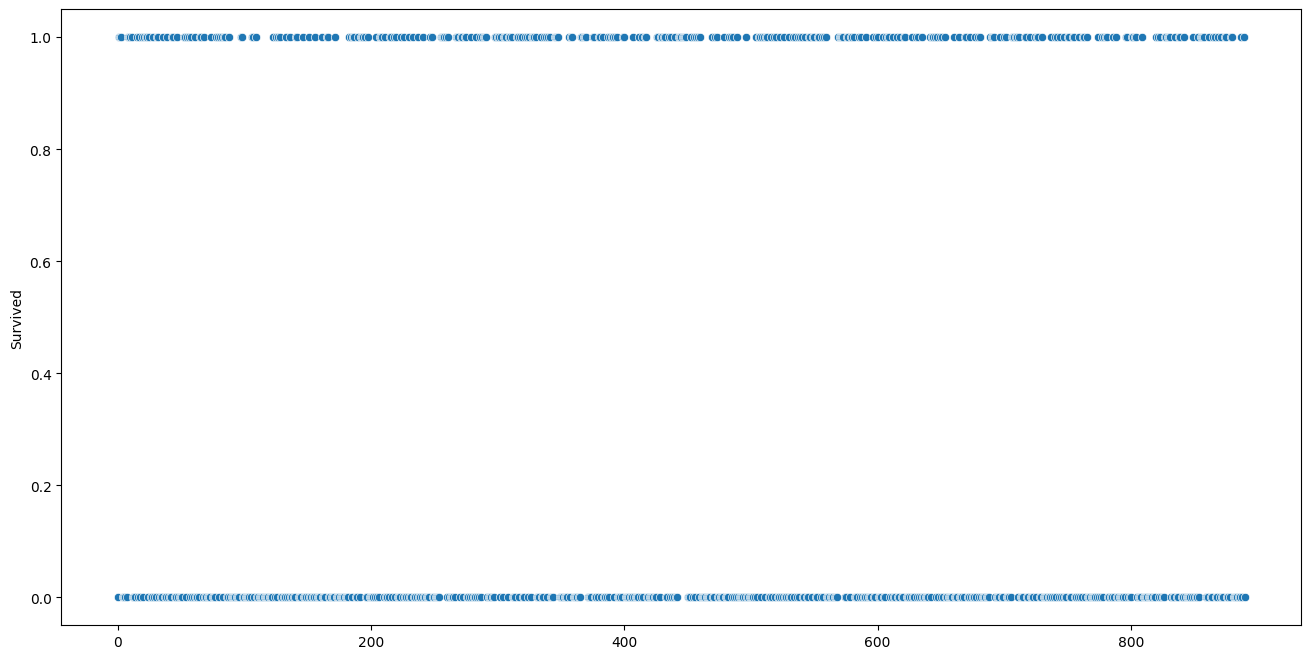

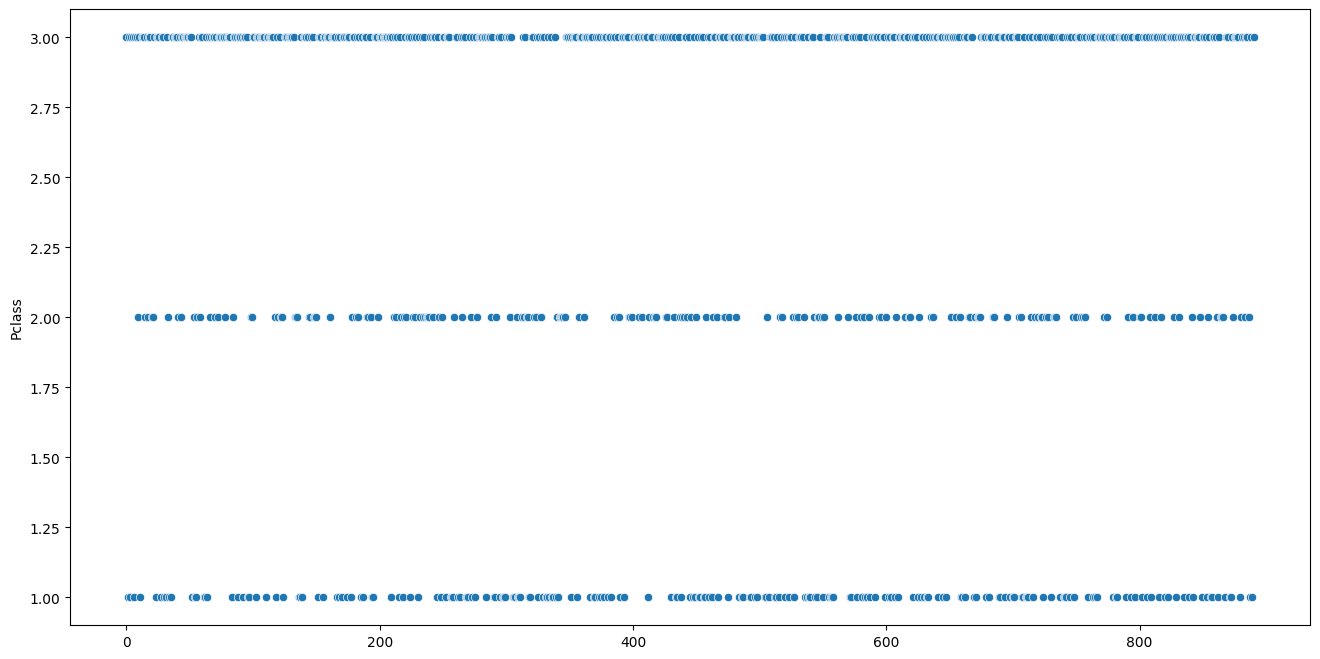

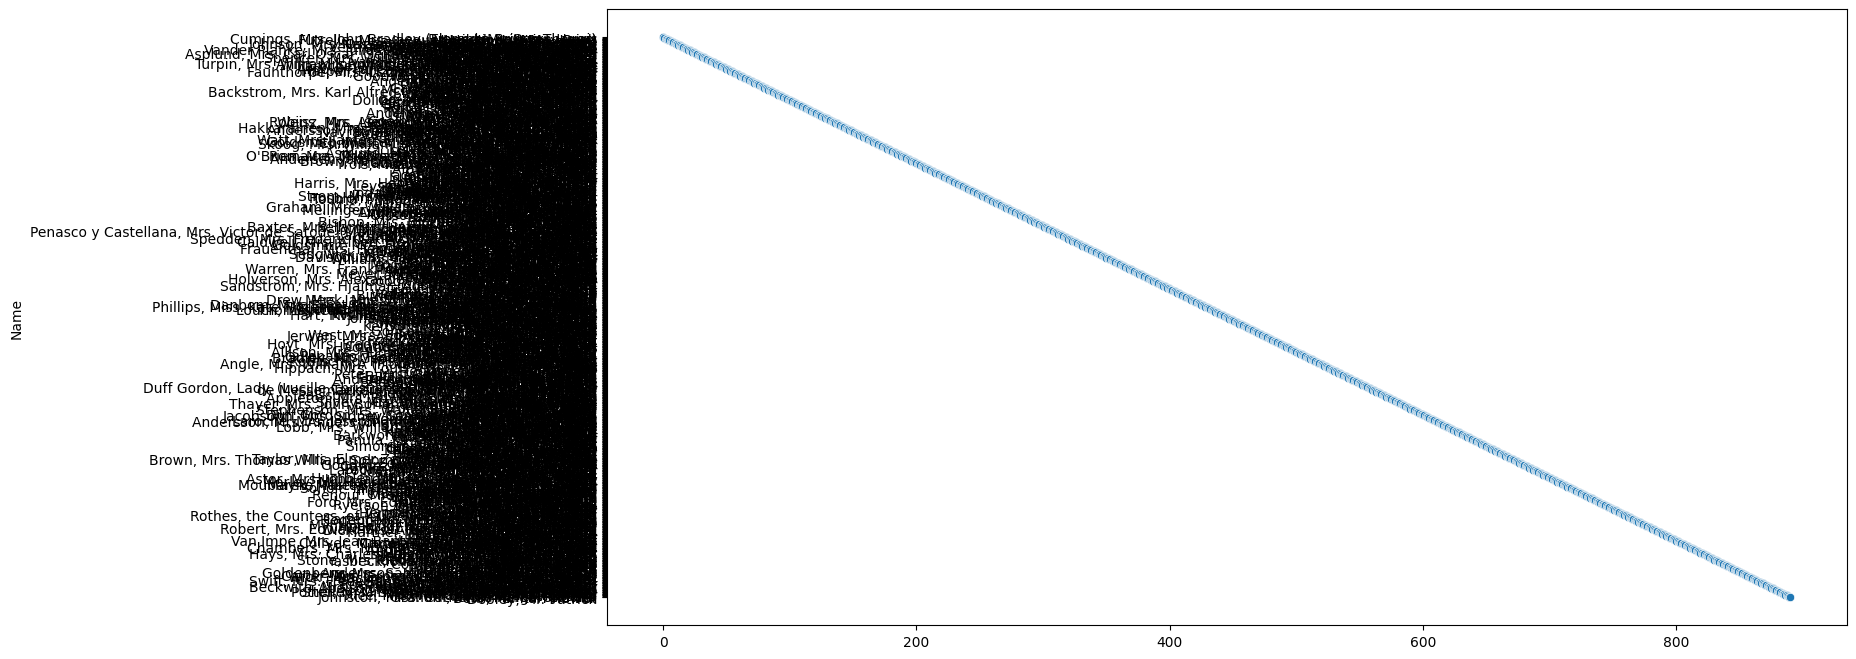

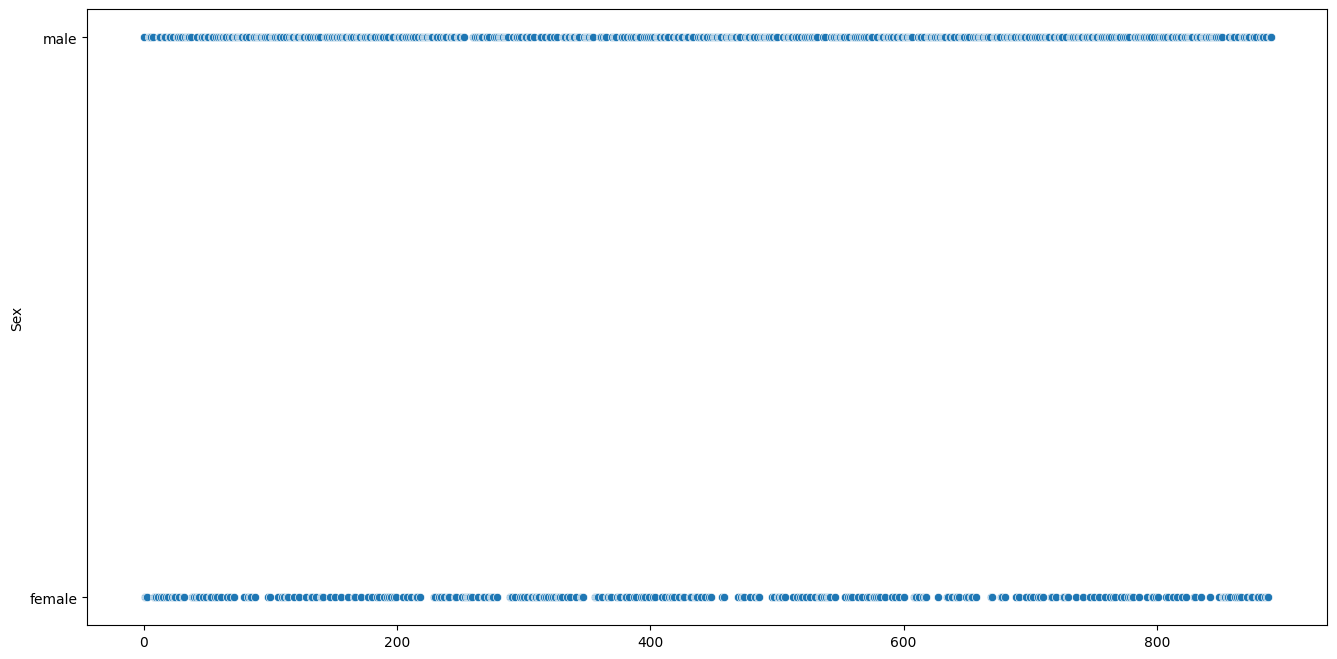

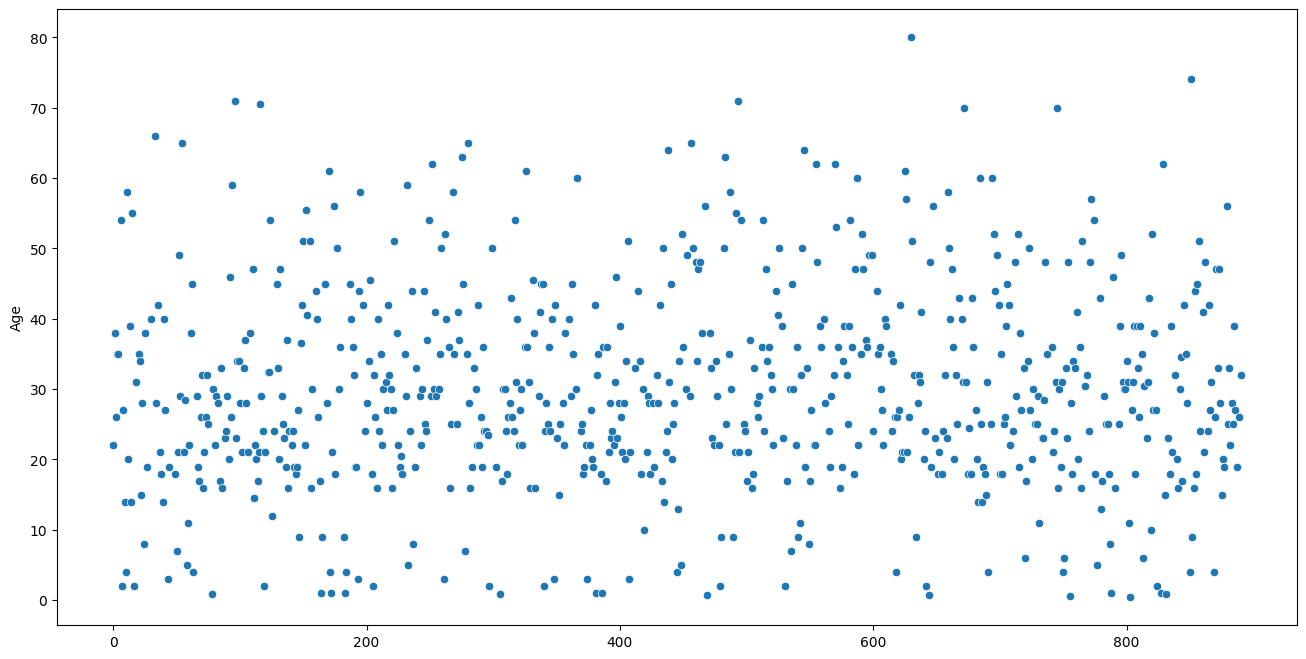

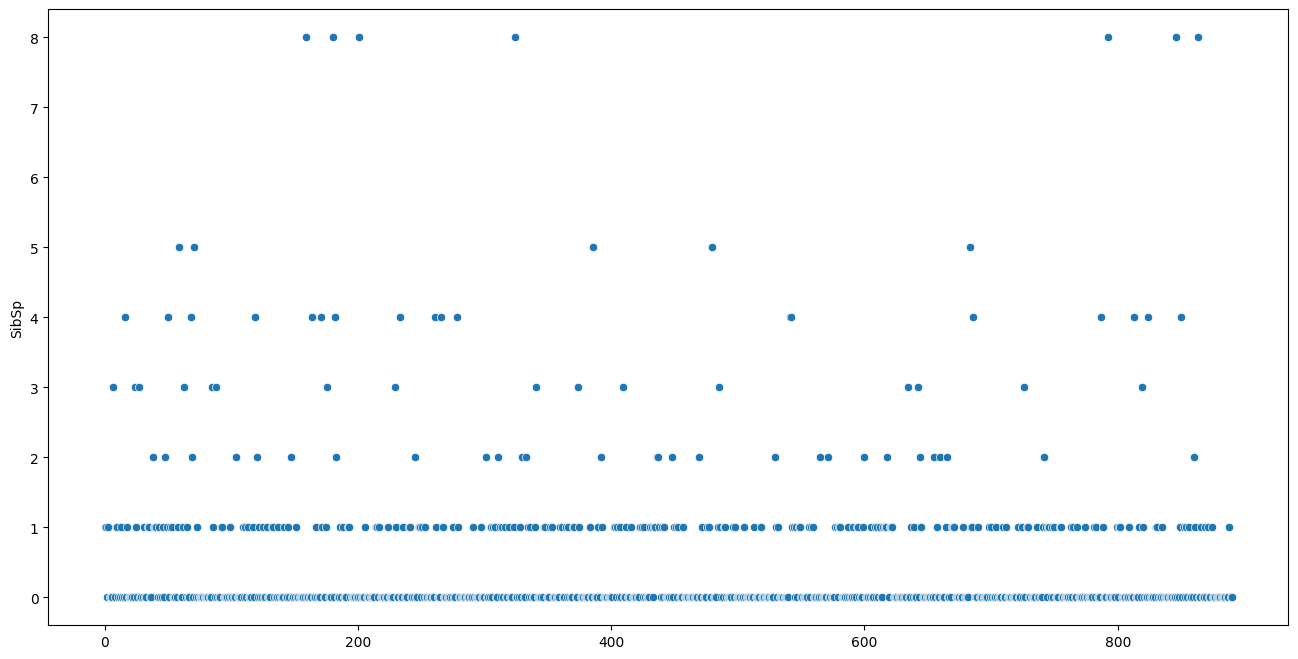

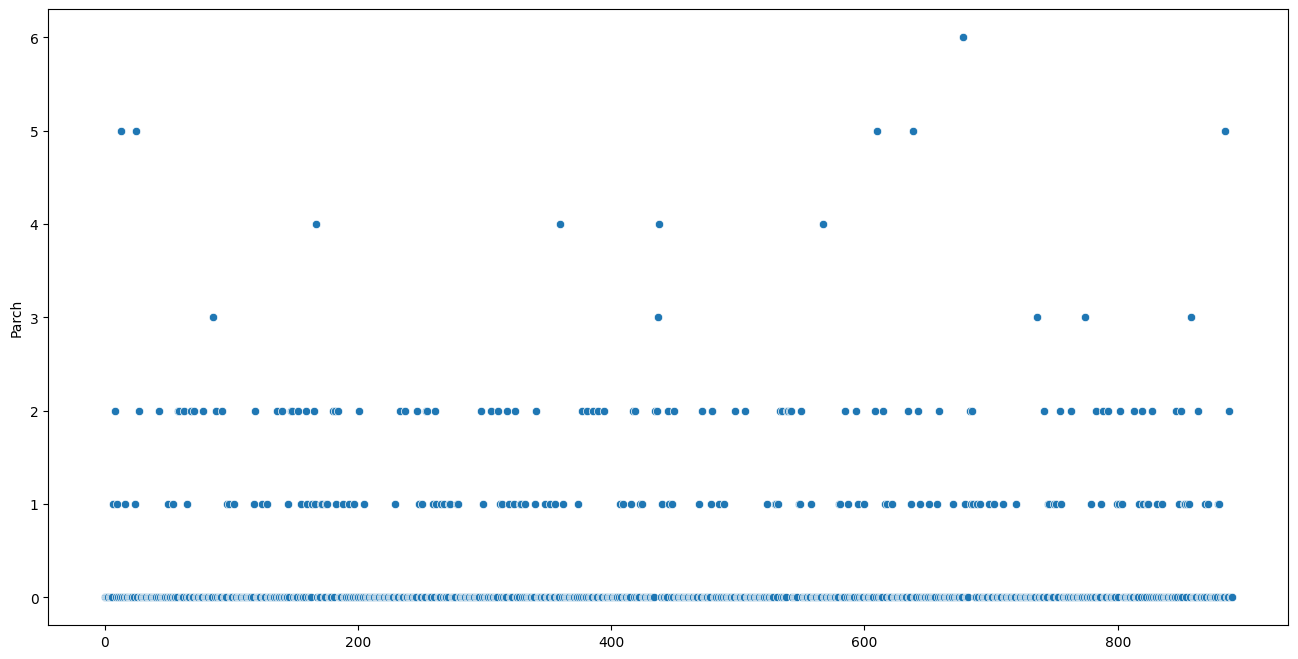

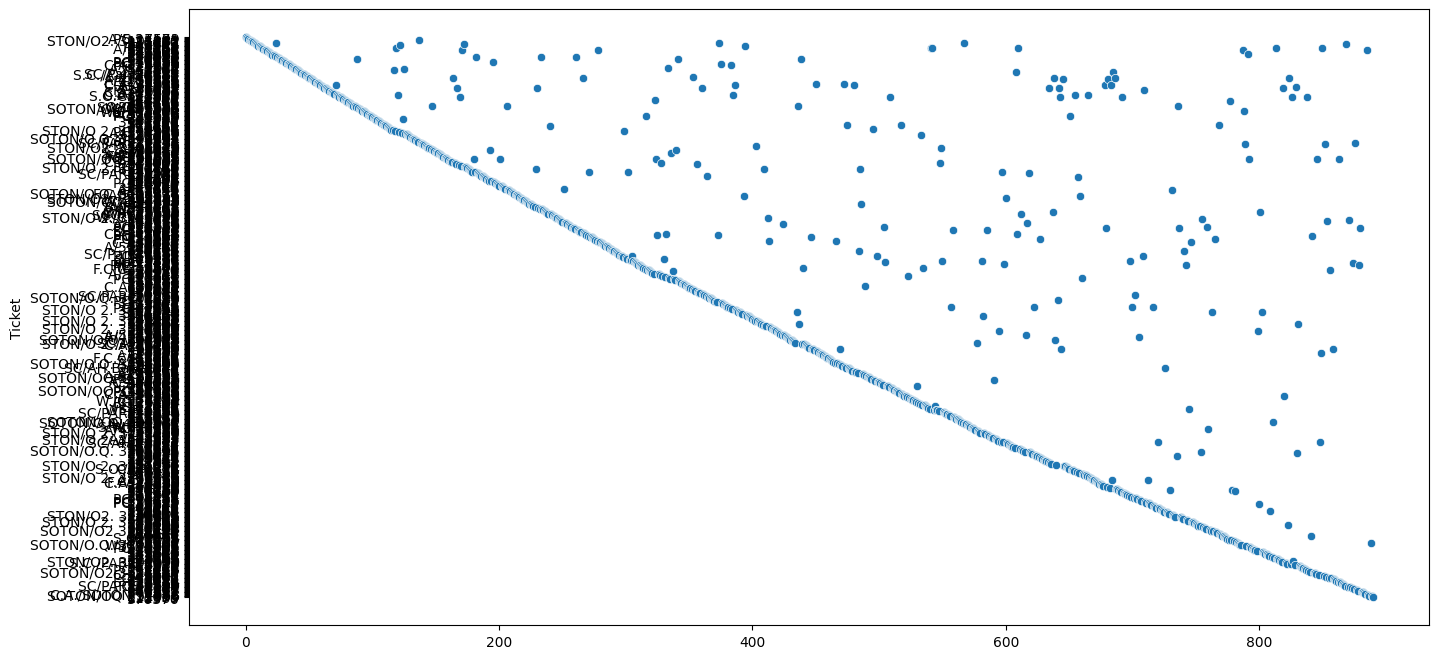

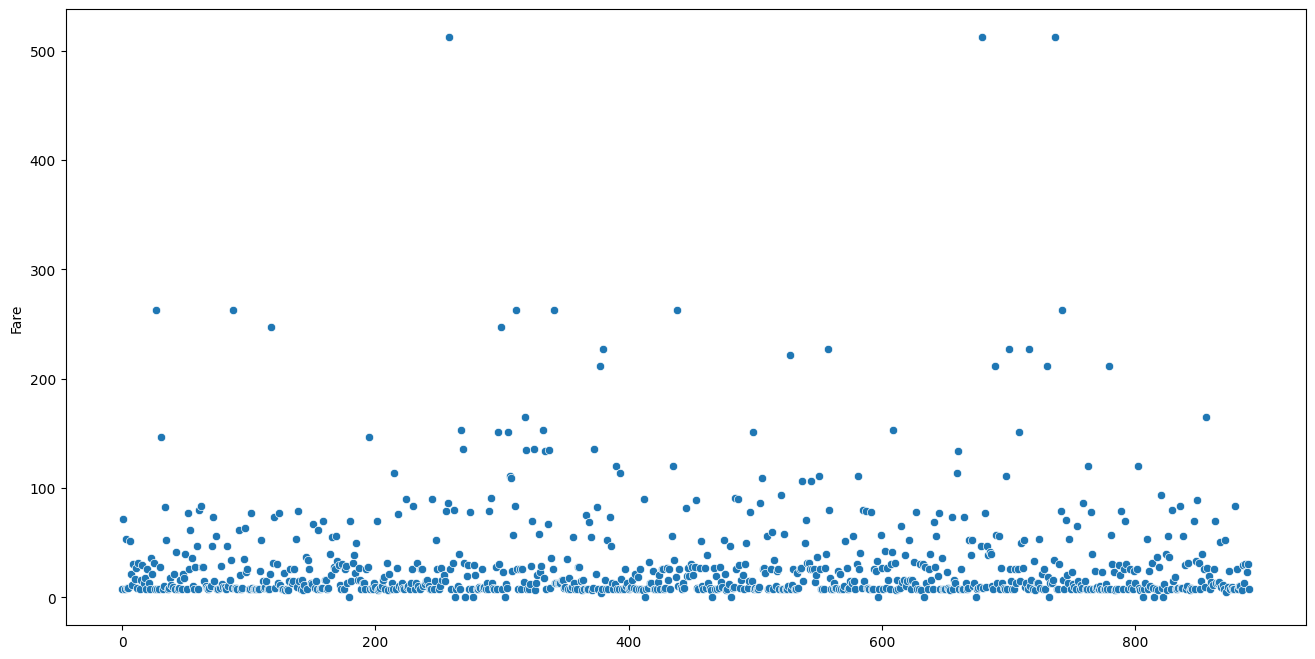

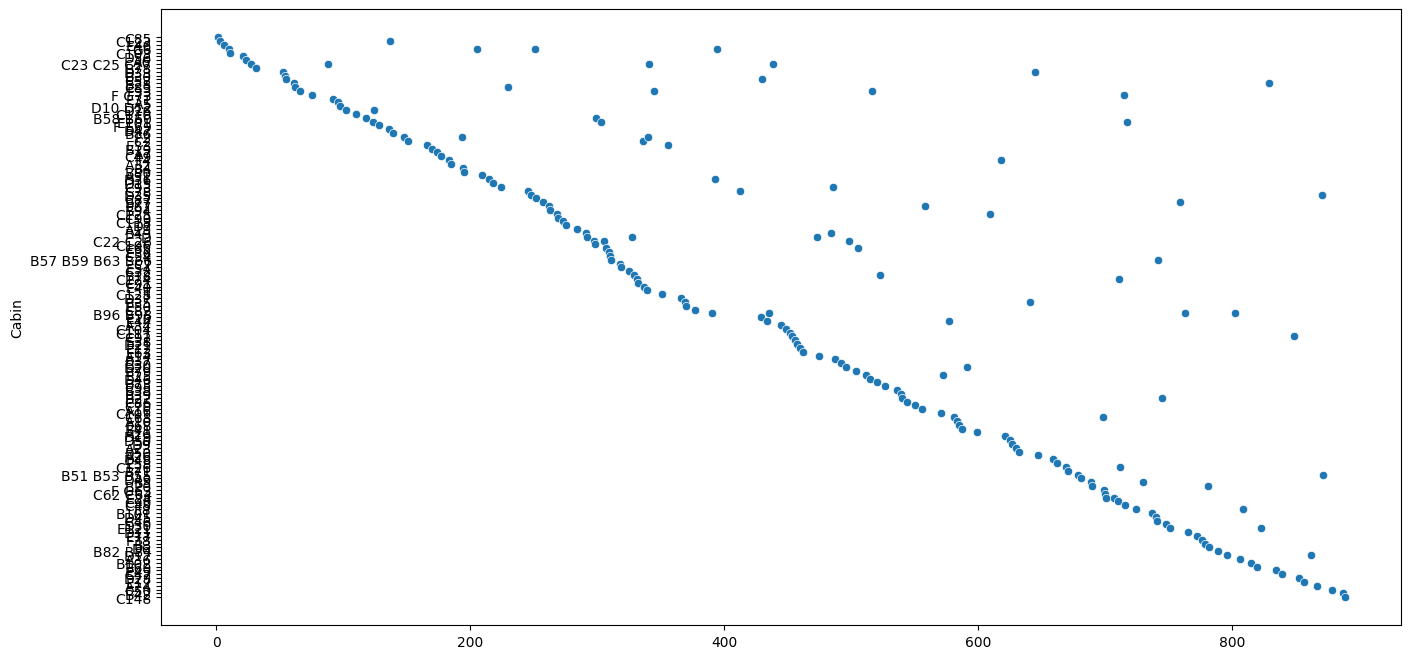

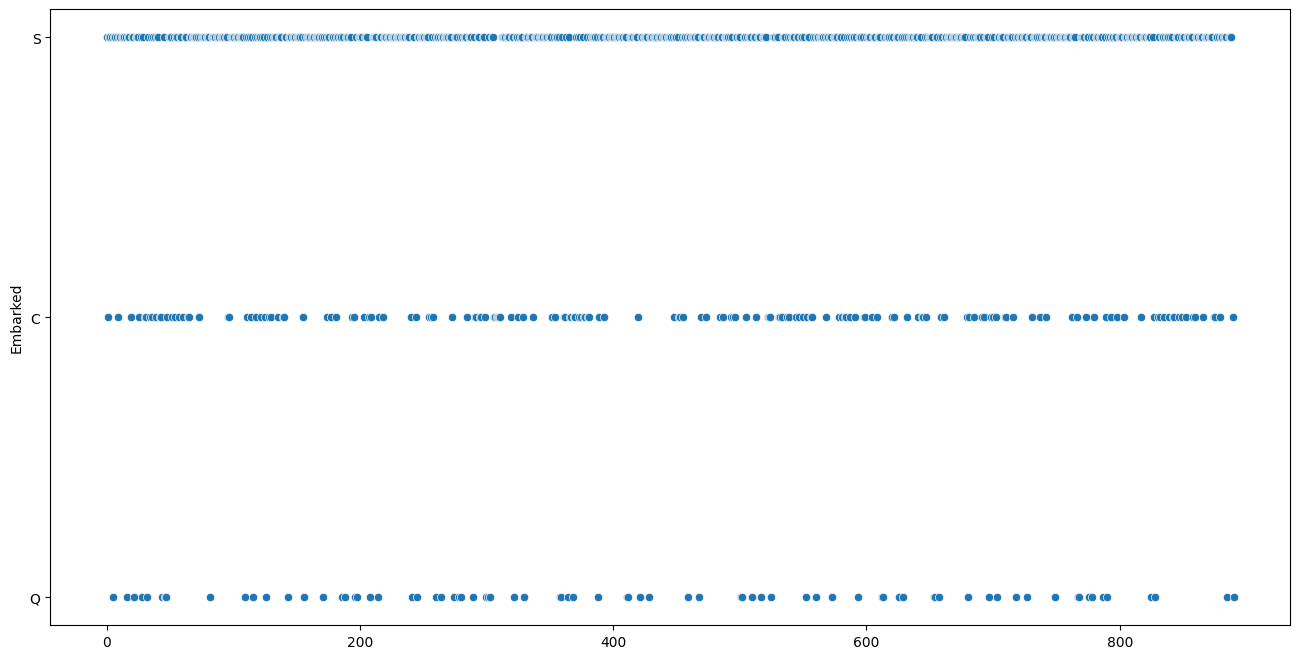

In [16]:
for feature in data.columns:
    plt.figure(figsize=(16,8))
    sns.scatterplot(data=data[feature])

## Correlation

In [17]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

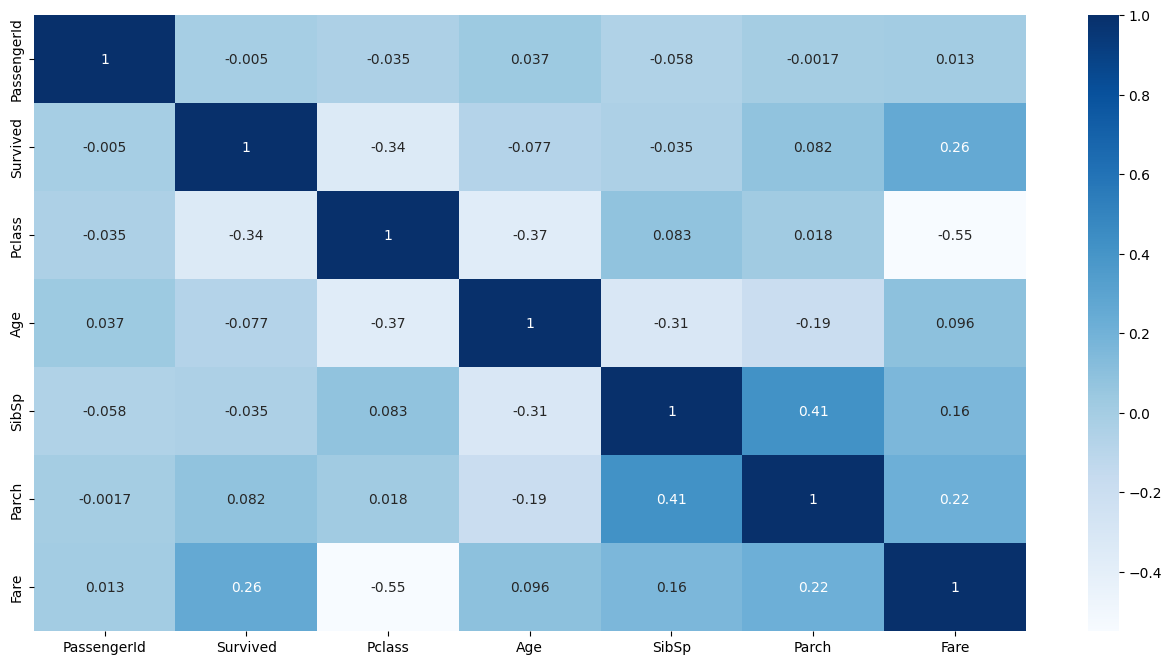

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(data=data.corr(), annot=True, cmap='Blues')

In [19]:
os.chdir(old_path)

## Conclusions
- Outliers and Missing values need to be handled
- Categoical features need to be handled
- Too many missing values in Cabin feature
- Some features have quite high correlation
- Data will need further analysis after the featue engineering